## Importing libraries

In [26]:
!pip install xgboost

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

## Importing Data

In [10]:
df = pd.read_csv("Telco-Customer-Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
print(df.isnull().sum())


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,1.621468e-01,0.368612,0.000000,0.000000,0.000000,0.000000,1.000000
tenure,7043.0,-2.421273e-17,1.000071,-1.318165,-0.951682,-0.137274,0.921455,1.613701
MonthlyCharges,7043.0,-6.406285e-17,1.000071,-1.545860,-0.972540,0.185733,0.833833,1.794352
TotalCharges,7043.0,-1.488074e-17,1.000071,-0.999120,-0.829846,-0.390463,0.664287,2.826743
Churn,7043.0,2.653699e-01,0.441561,0.000000,0.000000,0.000000,1.000000,1.000000


In [38]:
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le
    

In [39]:
df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,-1.277445,-1.160323,-0.994242,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,0.066327,-0.259629,-0.173244,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,-1.236724,-0.362660,-0.959674,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,0.514251,-0.746535,-0.194766,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,-1.236724,0.197365,-0.940470,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,-0.340876,0.665992,-0.128655,0,True,True,True,True,False,...,False,True,False,True,True,False,True,False,False,True
7039,0,1.613701,1.277533,2.243151,0,False,True,True,True,False,...,False,True,False,True,True,False,True,True,False,False
7040,0,-0.870241,-1.168632,-0.854469,0,False,True,True,False,True,...,False,False,False,False,False,False,True,False,True,False
7041,1,-1.155283,0.320338,-0.872062,1,True,True,False,True,False,...,False,False,False,False,False,False,True,False,False,True


Churn
No     5174
Yes    1869
Name: count, dtype: int64


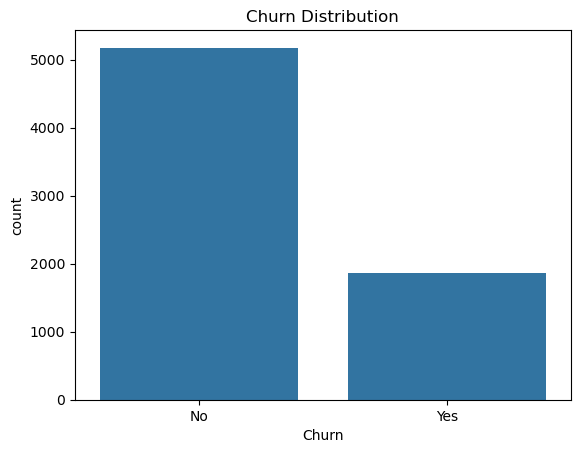

In [13]:
print(df["Churn"].value_counts())
sns.countplot(x="Churn", data=df)
plt.title("Churn Distribution")
plt.show()

## Data Preprocessing

In [14]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].median())

In [15]:
df.drop(columns=['customerID'], inplace=True)
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})
categorical_cols = df.select_dtypes(include=["object"]).columns
print("Categorical Columns:", categorical_cols)
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

Categorical Columns: Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [41]:
X = df.drop(columns=["Churn"])
y = df["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training Set: {X_train.shape}, Testing Set: {X_test.shape}")

Training Set: (5634, 30), Testing Set: (1409, 30)


In [18]:
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_log)
precision = precision_score(y_test, y_pred_log)
recall = recall_score(y_test, y_pred_log)
f1 = f1_score(y_test, y_pred_log)
print(f"Logistic Regression:\nAccuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")

Logistic Regression:
Accuracy: 0.8048, Precision: 0.6552, Recall: 0.5588, F1-score: 0.6032


In [20]:
rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print(f"Random Forest:\nAccuracy: {accuracy_rf:.4f}, Precision: {precision_rf:.4f}, Recall: {recall_rf:.4f}, F1-score: {f1_rf:.4f}")

Random Forest:
Accuracy: 0.8055, Precision: 0.6701, Recall: 0.5267, F1-score: 0.5898


In [28]:
xgb_model = XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

print(f"XGBoost:\nAccuracy: {accuracy_xgb:.4f}, Precision: {precision_xgb:.4f}, Recall: {recall_xgb:.4f}, F1-score: {f1_xgb:.4f}")

XGBoost:
Accuracy: 0.7913, Precision: 0.6290, Recall: 0.5214, F1-score: 0.5702


In [29]:

results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],
    "Accuracy": [0.8048, 0.8055, accuracy_xgb],
    "Precision": [0.6552, 0.6701, precision_xgb],
    "Recall": [0.5588, 0.5267, recall_xgb],
    "F1 Score": [0.6032, 0.5898, f1_xgb]
})


results = results.sort_values(by="F1 Score", ascending=False)

print(results)

                 Model  Accuracy  Precision   Recall  F1 Score
0  Logistic Regression  0.804800   0.655200  0.55880  0.603200
1        Random Forest  0.805500   0.670100  0.52670  0.589800
2              XGBoost  0.791341   0.629032  0.52139  0.570175


In [32]:

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}


rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='f1', n_jobs=-1)
rf_grid.fit(X_train, y_train)


print("Best Parameters:", rf_grid.best_params_)

best_rf = rf_grid.best_estimator_
y_pred_rf_best = best_rf.predict(X_test)


accuracy_rf_best = accuracy_score(y_test, y_pred_rf_best)
precision_rf_best = precision_score(y_test, y_pred_rf_best)
recall_rf_best = recall_score(y_test, y_pred_rf_best)
f1_rf_best = f1_score(y_test, y_pred_rf_best)

print(f"Optimized Random Forest:\nAccuracy: {accuracy_rf_best:.4f}, Precision: {precision_rf_best:.4f}, Recall: {recall_rf_best:.4f}, F1-score: {f1_rf_best:.4f}")

Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 300}
Optimized Random Forest:
Accuracy: 0.8055, Precision: 0.6689, Recall: 0.5294, F1-score: 0.5910


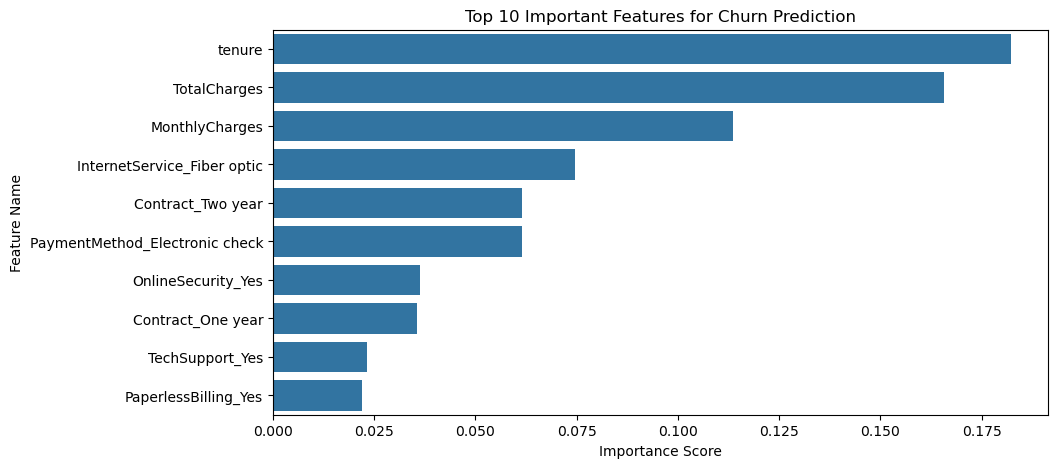

In [33]:

feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances[:10], y=feature_importances.index[:10])
plt.title("Top 10 Important Features for Churn Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.show()